This notebook allows to reproduce **Figure S4** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Thomas Jacobs, Tom Ruttink and Bernard De Baets.

#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:9088): GLib-GIO-WARNING **: 22:50:26.992: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

- Figure S4A: Study influence of *Overshoot* on the expected plant library size for full coverage  

In [4]:
include("DefaultParameters_k=3.jl");

In [11]:
## 3 gRNAs per vector
r = 3

E_KO3_bioccp, sd_KO3_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_KO3_sim, sd_KO3_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## 4 gRNAs per vector
r = 4

E_KO4_bioccp, sd_KO4_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_KO4_sim, sd_KO4_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)
## 5 gRNAs per vector
r = 5

E_KO5_bioccp, sd_KO5_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_KO5_sim, sd_KO5_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)


## 6 gRNAs per vector
r = 6

E_KO6_bioccp, sd_KO6_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_KO6_sim, sd_KO6_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500);

In [12]:
E_KO_sim = [E_KO3_sim, E_KO4_sim, E_KO5_sim,E_KO6_sim]
E_KO_bioccp = [E_KO3_bioccp, E_KO4_bioccp, E_KO5_bioccp, E_KO6_bioccp]
sd_KO_sim = [sd_KO3_sim, sd_KO4_sim, sd_KO5_sim, sd_KO6_sim]
sd_KO_bioccp = [sd_KO3_bioccp, sd_KO4_bioccp, sd_KO5_bioccp, sd_KO6_bioccp];

In [13]:
E_KO_sim

4-element Vector{Float64}:
 37961.902
  9954.842
  4187.408
  2155.696

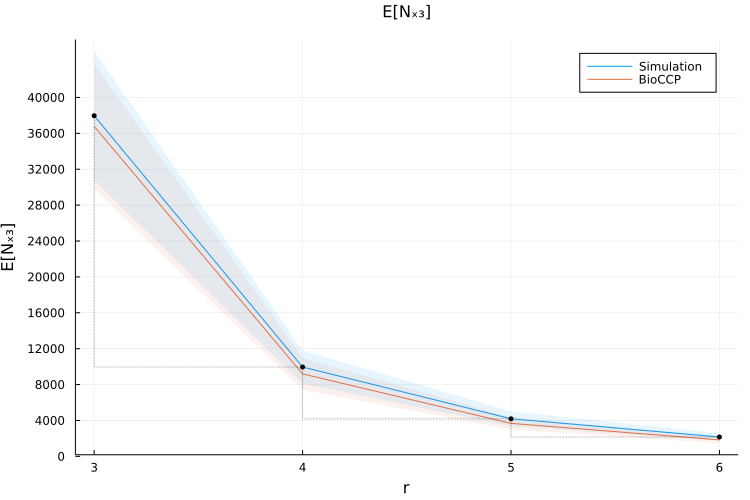

In [17]:
plot(3:6, E_KO_sim, label="Simulation", 
    title="E[Nₓ₃]
    ", xlabel="r", ylabel="E[Nₓ₃]",
    ribbon = sd_KO_sim, fillalpha=.1,
    xticks = (2:6, string.(2:6)),
    yticks = (0:4000:40000, string.(0:4000:40000)),
size = ((750,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(3:6, E_KO_bioccp,  label="BioCCP",
    ribbon = sd_KO_bioccp, 
    fillalpha=.1,
)

plot!(3:6, E_KO_sim,  label="",linestyle = :dot, linealpha = 0.5,
    seriestype = :steppre, linecolor = :black)

scatter!(3:6, E_KO_sim,  label="",markersize = 3, markercolor = :black)

- Figure S4B: Study influence of *Overshoot* on the expected combinatorial coverage w.r.t. plant library size

In [15]:
include("DefaultParameters_k=3.jl"); # reset to default values

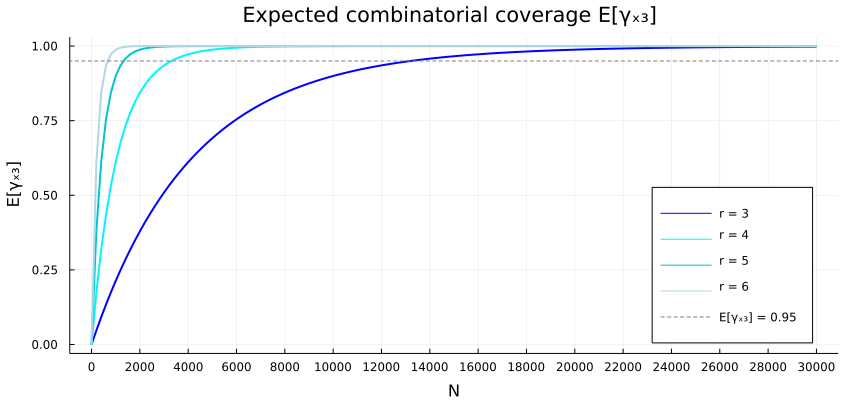

In [19]:
plant_library_sizes = 0:200:30000
expected_γₓ₃_3 = []
expected_γₓ₃_4 = []
expected_γₓ₃_5 = []
expected_γₓ₃_6 = []

for N in plant_library_sizes
    r = 3
    push!(expected_γₓ₃_3, BioCCP_γₓ₃(x, N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    
    r = 4
    push!(expected_γₓ₃_4, BioCCP_γₓ₃(x, N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    r = 5
    push!(expected_γₓ₃_5, BioCCP_γₓ₃(x, N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    
    r = 6
    push!(expected_γₓ₃_6, BioCCP_γₓ₃(x, N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))  
end
 
plot(plant_library_sizes, expected_γₓ₃_3,
label="r = 3", title="Expected combinatorial coverage E[γₓ₃] 
    ",
xlabel="N
    ", ylabel="
    E[γₓ₃]", 
        xticks = (0:2000:30000, string.(0:2000:30000)),
 size=(850,400), color=:blue, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₃_4, label="r = 4
    ", color=:turquoise1, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₃_5, label="r = 5
    ", color=:turquoise3, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₃_6, label="r = 6
    ", color=:lightblue, linewidth=2)

hline!([0.95], linestyle=:dash, color=:grey, label="E[γₓ₃] = 0.95", legend=:bottomright)